In [1]:
# Import Libraries 
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 
# linear algebra
import numpy as np 
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import category_encoders as ce

#for Machine learning 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree,svm
from sklearn.metrics import accuracy_score

In [3]:
# Retrieve Data for analysis
train = pd.read_csv('Resources_2/train.csv',index_col= None)
train_b = train.drop('PassengerId', axis=1,inplace=True)
test = pd.read_csv('Resources_2/test.csv',index_col= None)

In [7]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,2
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,4,2
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,1,2
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,1,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,26.0,1,2,W./C. 6607,23.4500,2,2
889,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,2,0


In [ ]:
#finding relation between features of traint_data and survival (EDA)
#finding and fixing null values and outliers (feature engineering)
#fitting data to various models and understanding behaviour and accuracy of model (MACHINE LEARNING)
#selection of final model and submission ( SUBMISSION)
#understanding and learning why we got only specific accuracy and why we got less accuracy for other models ( REVIEW)

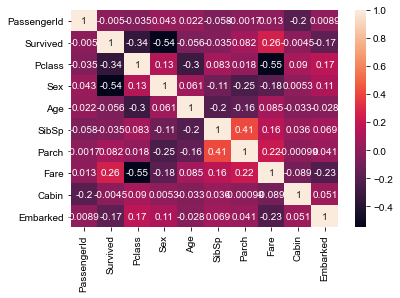

In [11]:
# plotting correlation heat map
HM=sns.heatmap(train.corr(),annot=True)
sns.set({'figure.figsize':(10,10)})

In [15]:
# ploting data of each feature
# seperate numeric and catagorical data 
# Numerical data
con = train[['Age','SibSp','Parch','Fare']]
# Catigorical data
cat = train[['Survived','Pclass','Name','Sex', 'Ticket', 'Cabin', 'Embarked']]
# pairplot
pair = train[['Pclass','Survived','Age','SibSp','Parch','Fare']]

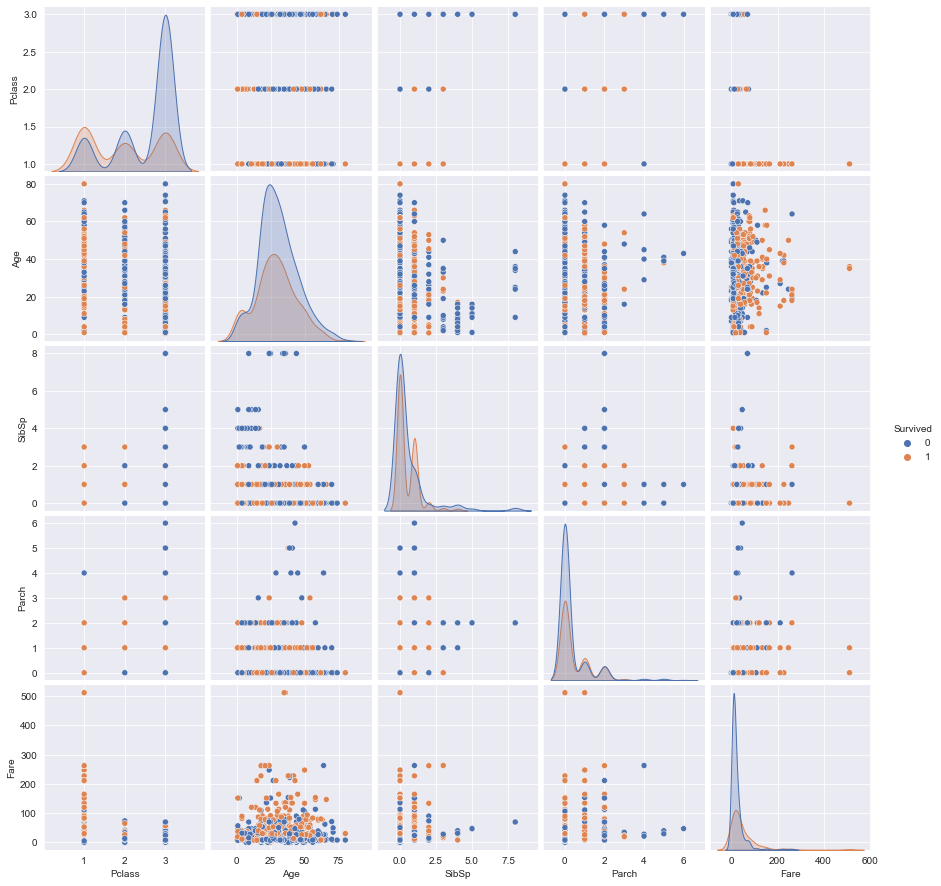

In [16]:
sns.pairplot(pair, hue='Survived', height=2.5);  
# pairplot 

C:\Users\mihma\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mihma\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mihma\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

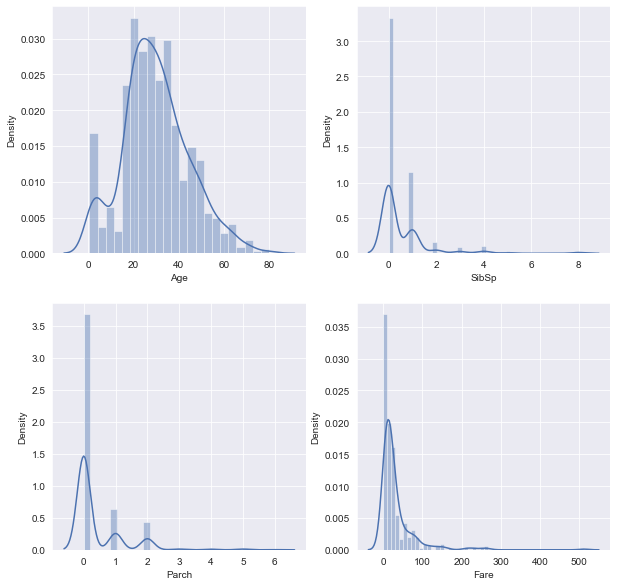

In [17]:
# skewness of features
c=0

for i in con.columns:
    if i in  list(con.columns):
        c+=1
    plt.subplot(2,2, c)
    sns.distplot(con[i])  
# one should use histplot but I like distplot 😅

# catagorical data 
#for i in cat.columns:
  #  sns.catplot(x=cat[i] ,y='Survived',data=cat,kind="bar" ,height=5)
   # plt.show()

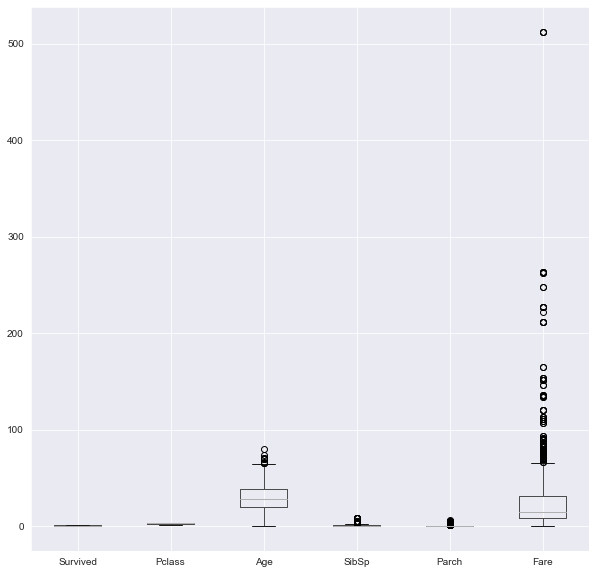

In [26]:
# outliers in each feature
train_b.drop('PassengerId', axis=1,inplace=True)
pair_b = train[['Sex','Pclass','Survived','Age','SibSp','Parch','Fare']]
train_b.boxplot()
plt.show()

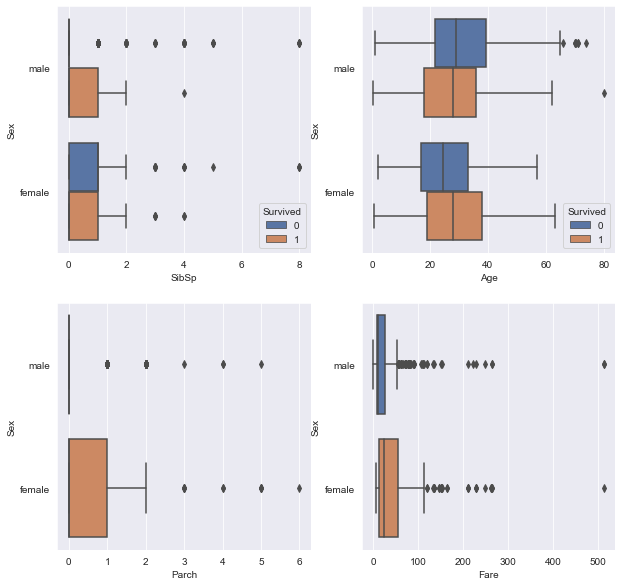

In [27]:
plt.subplot(2,2,1)
sns.boxplot(x='SibSp',y='Sex',hue='Survived',data=train_b)
plt.subplot(2,2,2)
sns.boxplot(x='Age',y='Sex',hue='Survived',data=train_b)
plt.subplot(2,2,3)
sns.boxplot(x='Parch',y='Sex',data=train_b)
plt.subplot(2,2,4)
sns.boxplot(x='Fare',y='Sex',data=train_b)
plt.show()

In [28]:
# relation of each feature with survived
def relate_feature(feature):
    graph=sns.catplot(x = feature, y = "Survived", data = train_b, kind="bar", height = 5)# feature input should be string
    if feature=='Survived' or  feature=='Ticket':
        table=1
    else :
        table=pd.pivot_table(train_b, index="Survived", columns= feature , values='Ticket',aggfunc='count')
    return table ,graph

(Sex       female  male
 Survived              
 0             81   468
 1            233   109,
 <seaborn.axisgrid.FacetGrid at 0x1b701d083a0>)

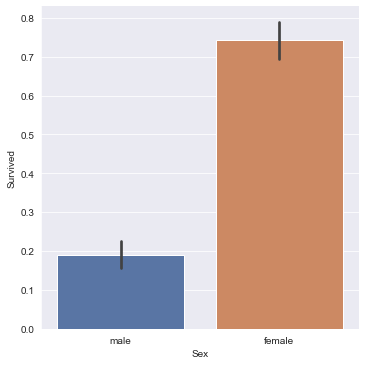

In [30]:
relate_feature("Sex")

(SibSp         0      1     2     3     4    5    8
 Survived                                          
 0         398.0   97.0  15.0  12.0  15.0  5.0  7.0
 1         210.0  112.0  13.0   4.0   3.0  NaN  NaN,
 <seaborn.axisgrid.FacetGrid at 0x1b72d15cc70>)

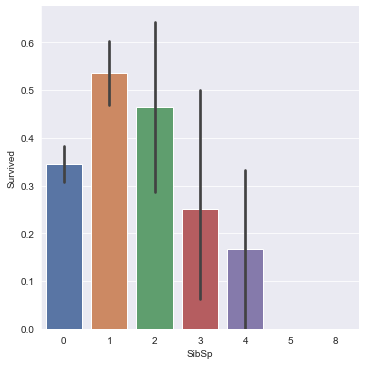

In [31]:
relate_feature("SibSp")

(Pclass      1   2    3
 Survived              
 0          80  97  372
 1         136  87  119,
 <seaborn.axisgrid.FacetGrid at 0x1b72e5d7130>)

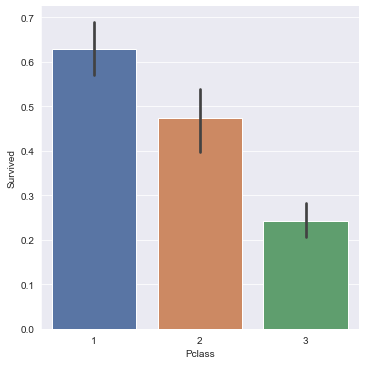

In [32]:
relate_feature("Pclass")

(Embarked   C   Q    S
 Survived             
 0         75  47  427
 1         93  30  217,
 <seaborn.axisgrid.FacetGrid at 0x1b731c39f70>)

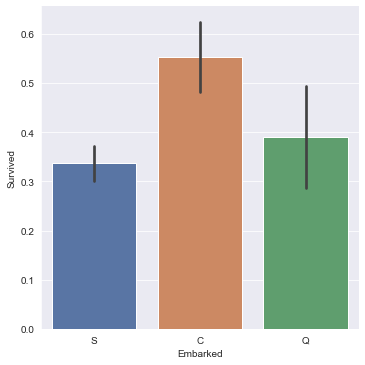

In [33]:
relate_feature("Embarked")

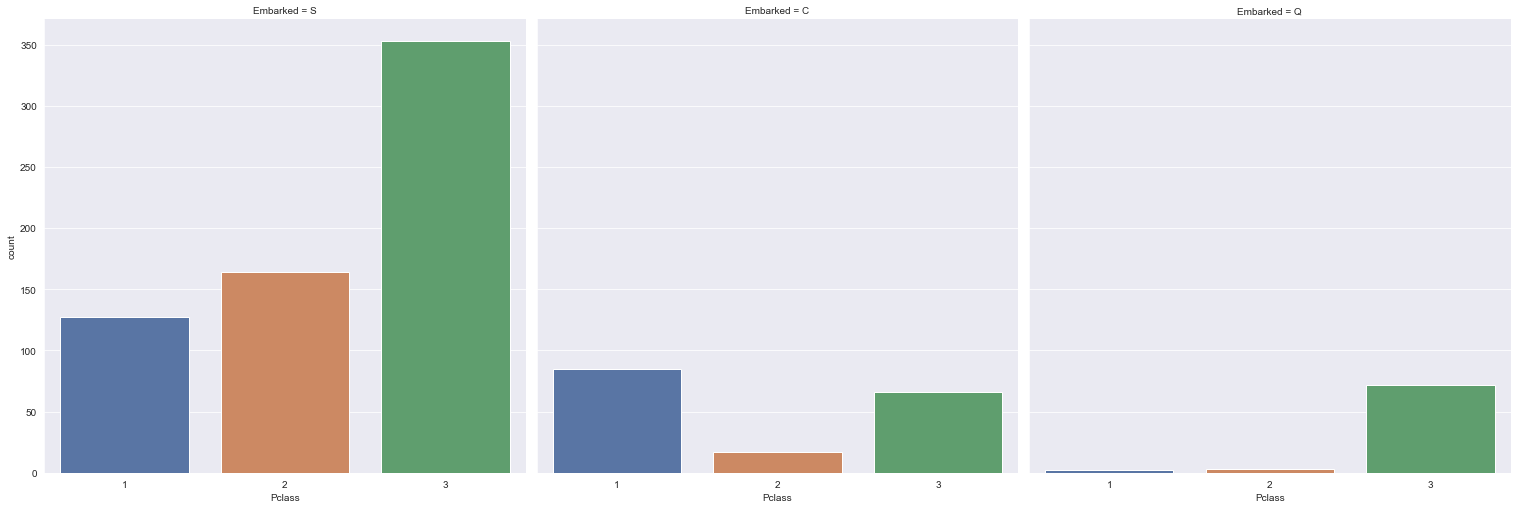

In [34]:
# inter relation of features
sns.catplot(x="Pclass", col="Embarked", data = train_b, kind="count", height=7)

In [35]:
table1 = pd.pivot_table(train_b,index=['Sex','Pclass'])
table2 = pd.pivot_table(train_b,index=['Sex','Pclass'],aggfunc={'Age':np.mean,'Survived':np.sum})
table1

Age        Fare     Parch     SibSp  Survived
Sex    Pclass                                                     
female 1       34.611765  106.125798  0.457447  0.553191  0.968085
       2       28.722973   21.970121  0.605263  0.486842  0.921053
       3       21.750000   16.118810  0.798611  0.895833  0.500000
male   1       41.281386   67.226127  0.278689  0.311475  0.368852
       2       30.740707   19.741782  0.222222  0.342593  0.157407
       3       26.507589   12.661633  0.224784  0.498559  0.135447

In [36]:
table2

Age  Survived
Sex    Pclass                     
female 1       34.611765        91
       2       28.722973        70
       3       21.750000        72
male   1       41.281386        45
       2       30.740707        17
       3       26.507589        47